<a href="https://colab.research.google.com/github/financieras/pyCourse/blob/main/jupyter/calisto3/0270_prestamos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Préstamos
## Función Pago (pmt)
* npf.pmt(rate, nper, pv, fv, when = ‘end’)
* fv es optativo, por defecto es 0
* when es optativo, por defecto es 'end', pagos a final de periodo, pospagable
* Calcular el pago mensual periódico necesario para amortizar un préstamo de 350.000 €, a 20 años, al 6% TIN (Tipo de Interés Nominal)
* con Excel: =PAGO(6%/12;20*12;-350000)

In [1]:
!pip install numpy-financial   # instalamos con pip la librería financiera

In [2]:
import numpy_financial as npf

pago = npf.pmt(0.06/12, 20 * 12, 350_000)

# Here fv = 0 ; Also Default value of fv = 0
print(f"Pago mensual: {-pago:,.2f} €" )

Pago mensual: 2,507.51 €


## Cuadro de amortización de un préstamo
Préstamo francés de 100.000 euros, a devolver en 10 años, al 5% anual.

In [3]:
import numpy_financial as npf
import numpy as np
import tabulate as tab
import matplotlib.pyplot as plt

# en primer lugar vamos a calcular la cuota constante

C0 = 100000
n = 10
tasa = 0.05

pago = npf.pmt(rate=tasa, nper=n, pv=-C0, fv=0, when='end')
print(pago)

12950.457496545661


In [4]:
#Vamos a calcular el capital pendiente de cada periodo

pendiente = npf.fv(rate=tasa, nper =range(n+1), pmt = pago, pv= -C0)
print(pendiente)

[100000.          92049.54250345  83701.56213208  74936.18274214
  65732.5343827   56068.70360529  45921.68128901  35267.30785691
  24080.21575321  12333.76904433     -0.        ]


In [5]:
#Calculamos la amortización de cada año

amortz = npf.ppmt(rate=tasa, per=range(n+1), nper=n, pv=-C0, fv=0, when='end')
print(amortz)

[ 7571.86428242  7950.45749655  8347.98037137  8765.37938994
  9203.64835944  9663.83077741 10147.02231628 10654.3734321
 11187.0921037  11746.44670888 12333.76904433]


In [6]:
#Calculamos los intereses de cada periodo

interes = npf.ipmt(rate=tasa, per=range(n+1), nper=n, pv=-C0, fv=0)
print(interes)

[5378.59321412 5000.         4602.47712517 4185.0781066  3746.80913711
 3286.62671914 2803.43518026 2296.08406445 1763.36539285 1204.01078766
  616.68845222]


In [7]:
#Comprobamos

comprob = np.array(amortz + interes)
print(comprob)

[12950.45749655 12950.45749655 12950.45749655 12950.45749655
 12950.45749655 12950.45749655 12950.45749655 12950.45749655
 12950.45749655 12950.45749655 12950.45749655]


In [8]:
#Hacemos un cuadro de amortización para ver los datos con la librería tabulate
datos =[]
saldo = C0
saldo2 = 0
linea1 = [0,0,0,0,C0,0]
datos.append(linea1)

Anualidad = npf.pmt(rate=tasa, nper=n, pv=-C0, fv=0, when='end')

for i in range(1, n+1):
    pago_capital = npf.ppmt(rate=tasa, per=i, nper=n, pv=-C0, fv=0, when='end')
    pago_int = Anualidad - pago_capital
    saldo -= pago_capital
    saldo2 += pago_capital

    linea = [i, format(Anualidad, '.0f'),  format(pago_int, '.0f'), format(pago_capital, '.0f'), format(saldo, '.0f'), format(saldo2, '.0f')]

    datos.append(linea)

print(tab.tabulate(datos, headers= ['Periodo', 'Anualidad', 'Intereses', 'Amortización','Capital Vivo','Capital Amortizado'], tablefmt = 'psql'))

+-----------+-------------+-------------+----------------+----------------+----------------------+
|   Periodo |   Anualidad |   Intereses |   Amortización |   Capital Vivo |   Capital Amortizado |
|-----------+-------------+-------------+----------------+----------------+----------------------|
|         0 |           0 |           0 |              0 |         100000 |                    0 |
|         1 |       12950 |        5000 |           7950 |          92050 |                 7950 |
|         2 |       12950 |        4602 |           8348 |          83702 |                16298 |
|         3 |       12950 |        4185 |           8765 |          74936 |                25064 |
|         4 |       12950 |        3747 |           9204 |          65733 |                34267 |
|         5 |       12950 |        3287 |           9664 |          56069 |                43931 |
|         6 |       12950 |        2803 |          10147 |          45922 |                54078 |
|         

[]

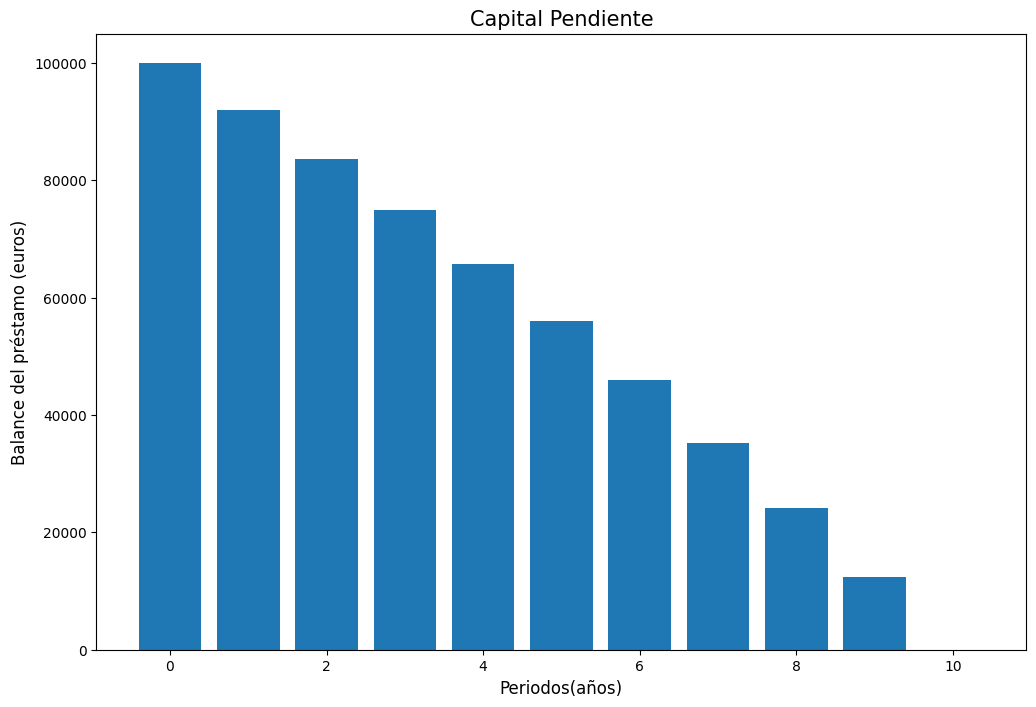

In [9]:
#Comprobemos como evoluciona nuestro prestamo en la siguiente gráfica

plt.figure(figsize = (12, 8))
plt.bar(range(0, n + 1), pendiente)
plt.title("Capital Pendiente", fontsize = 15)
plt.xlabel("Periodos(años)", fontsize = 12)
plt.ylabel("Balance del préstamo (euros)", fontsize = 12)
plt.plot()

[]

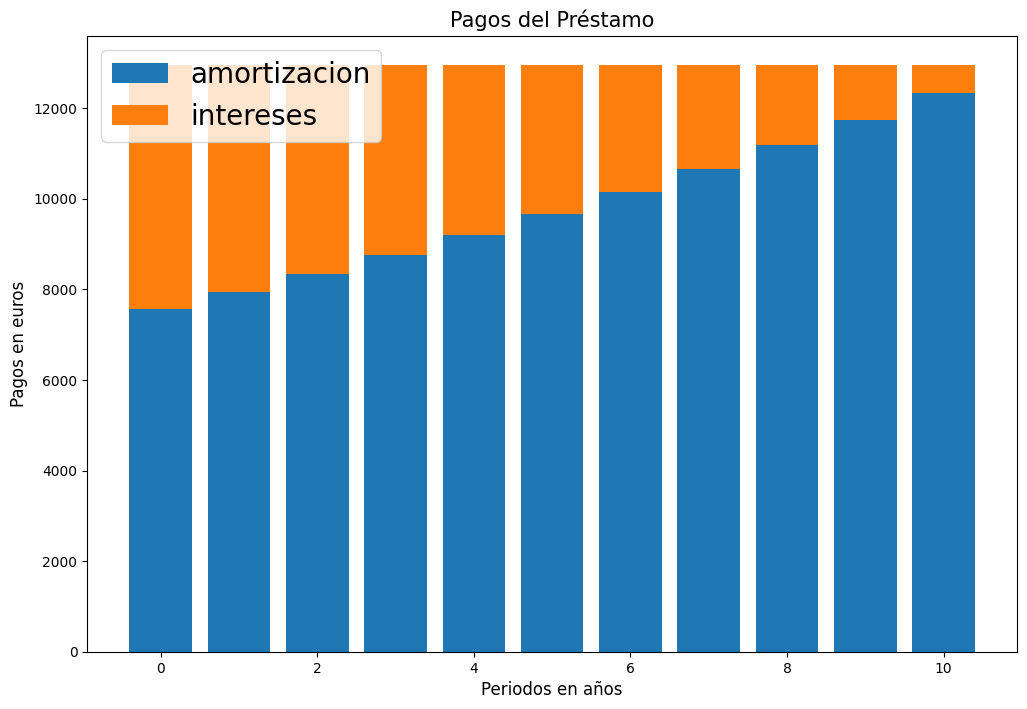

In [10]:
plt.figure(figsize = (12, 8))
plt.bar(range(0, n + 1), amortz, label = 'amortizacion')
plt.bar(range(0, n + 1), interes, bottom= amortz, label='intereses')
plt.legend(fontsize = 20)
plt.title("Pagos del Préstamo", fontsize = 15)
plt.xlabel("Periodos en años", fontsize = 12)
plt.ylabel("Pagos en euros", fontsize = 12)
plt.plot()